In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [3]:
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

## load data: a fictional telco company that provided home phone and Internet services https://www.kaggle.com/datasets/abdallahwagih/telco-customer-churn, originally from IBM website

In [5]:
df = pd.read_excel(r"C:\Project\Telco_customer_churn.xlsx")

In [7]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [9]:
df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


In [11]:
df.select_dtypes(include=['object', 'category']).describe()

,CustomerID,Country,State,City,Lat Long,Gender,Senior Citizen,Partner,Dependents,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Total Charges,Churn Label,Churn Reason
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.0,7043,1869
unique,7043,1,1,1129,1652,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531.0,2,20
top,3668-QPYBK,United States,California,Los Angeles,"33.964131, -118.272783",Male,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,20.2,No,Attitude of support person
freq,1,7043,7043,305,5,3555,5901,3641,5416,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11.0,5174,192


## data cleaning: missing, duplicates

In [13]:
df.isnull().sum() # churn reason is missing for customers who stay

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [15]:
df.duplicated().sum()

0

### This dataset includes one indicator if custormers churn or not, and other information e.g. how much each customer pays monthly (Monthly Charges).

### Both Churn and Monthly charges are important metrics for the phone and internet service provider to care about. What is the relationship between these two important metrics? 

### Without considering any other factos, we first run a simple model to look at their relationship

### Navie Model: Churn ~ Monthly Charges

In [17]:
monthly_charge = sm.add_constant(df[['Monthly Charges']])
model = sm.Logit(df['Churn Value'], monthly_charge).fit()

marginal_effects = model.get_margeff()
print(marginal_effects.summary())

Optimization terminated successfully.
         Current function value: 0.559294
         Iterations 5
        Logit Marginal Effects       
Dep. Variable:            Churn Value
Method:                          dydx
At:                           overall
                     dy/dx    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Monthly Charges     0.0029      0.000     16.831      0.000       0.003       0.003


### Now, check other factors related with both Churn and Monthly Charges, some examples are as shown below:

In [19]:
df['Internet Service Value'] = np.where(
    df['Internet Service'] == 'No internet service', 0, 1
)

for v in [
    'Phone Service', 
    'Multiple Lines', 
    'Online Security', 
    'Online Backup', 
    'Device Protection', 
    'Tech Support',
    'Streaming TV', # free service
    'Streaming Movies' # free service
]:
    df[v + ' Value'] = np.where(
    df[v] == 'Yes', 1, 0
)

df['n_service_paid'] = df[['Phone Service Value', 
    'Multiple Lines Value',
    'Internet Service Value', 
    'Online Security Value', 
    'Online Backup Value', 
    'Device Protection Value', 
    'Tech Support Value']].sum(axis=1)

df['n_service_internet_add_paid'] = df[[
    'Online Security Value', 
    'Online Backup Value', 
    'Device Protection Value', 
    'Tech Support Value']].sum(axis=1)

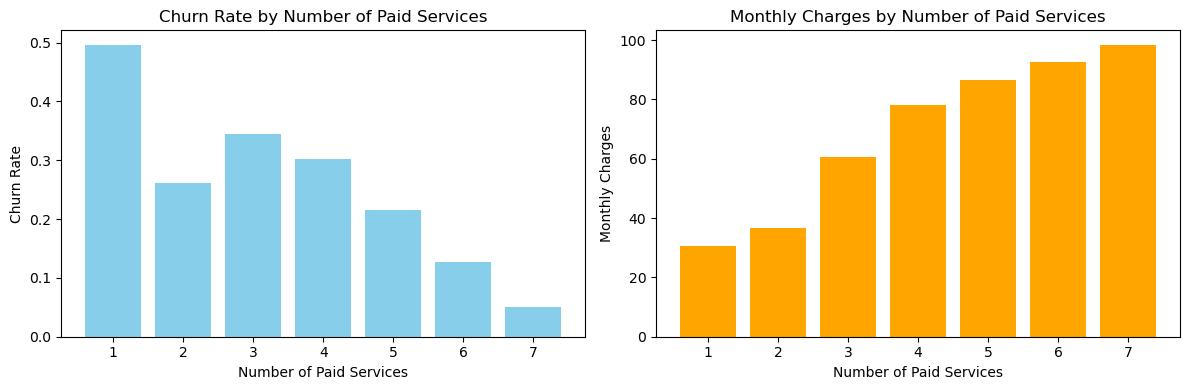

In [21]:
churn_mean = df.groupby('n_service_paid',observed=False)['Churn Value'].mean()
charges_mean = df.groupby('n_service_paid',observed=False)['Monthly Charges'].mean()

fig, ax = plt.subplots(1, 2, figsize=(12, 4)) 

ax[0].bar(churn_mean.index, churn_mean, color='skyblue')
ax[0].set_title('Churn Rate by Number of Paid Services')
ax[0].set_xlabel('Number of Paid Services')
ax[0].set_ylabel('Churn Rate')

ax[1].bar(charges_mean.index, charges_mean, color='orange')
ax[1].set_title('Monthly Charges by Number of Paid Services')
ax[1].set_xlabel('Number of Paid Services')
ax[1].set_ylabel('Monthly Charges')

plt.tight_layout() 
plt.show()

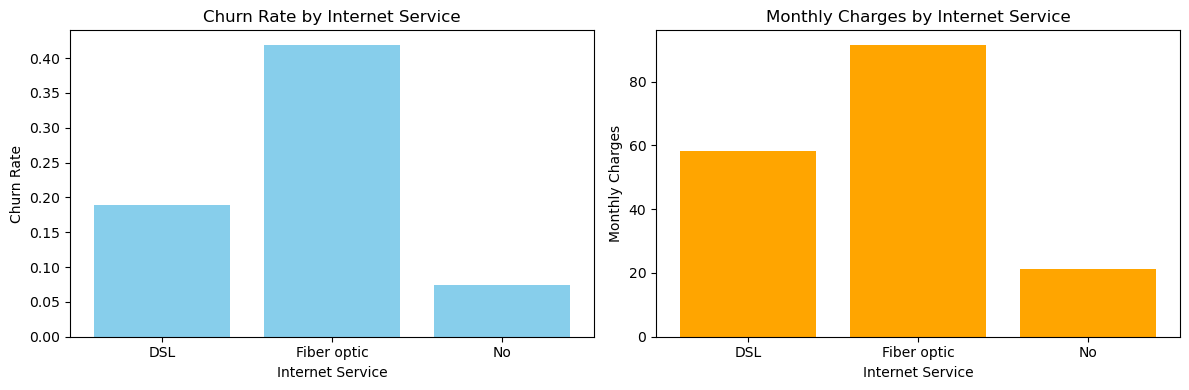

In [23]:
churn_mean = df.groupby('Internet Service')['Churn Value'].mean()
charges_mean = df.groupby('Internet Service')['Monthly Charges'].mean()

fig, ax = plt.subplots(1, 2, figsize=(12, 4))  

ax[0].bar(churn_mean.index, churn_mean, color='skyblue')
ax[0].set_title('Churn Rate by Internet Service')
ax[0].set_xlabel('Internet Service')
ax[0].set_ylabel('Churn Rate')

ax[1].bar(charges_mean.index, charges_mean, color='orange')
ax[1].set_title('Monthly Charges by Internet Service')
ax[1].set_xlabel('Internet Service')
ax[1].set_ylabel('Monthly Charges')

plt.tight_layout() 
plt.show()

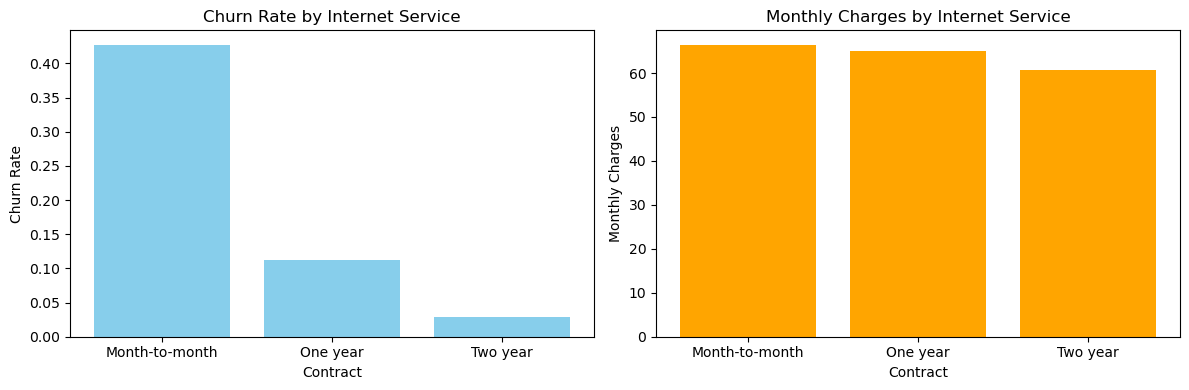

In [25]:
churn_mean = df.groupby('Contract')['Churn Value'].mean()
charges_mean = df.groupby('Contract')['Monthly Charges'].mean()

fig, ax = plt.subplots(1, 2, figsize=(12, 4))  

ax[0].bar(churn_mean.index, churn_mean, color='skyblue')
ax[0].set_title('Churn Rate by Internet Service')
ax[0].set_xlabel('Contract')
ax[0].set_ylabel('Churn Rate')

ax[1].bar(charges_mean.index, charges_mean, color='orange')
ax[1].set_title('Monthly Charges by Internet Service')
ax[1].set_xlabel('Contract')
ax[1].set_ylabel('Monthly Charges')

plt.tight_layout() 
plt.show()

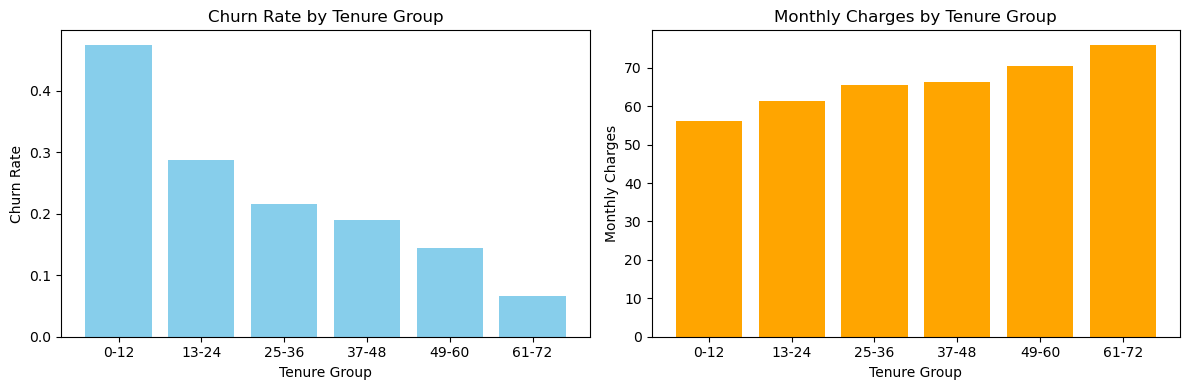

In [27]:
bins = [-1, 12, 24, 36, 48, 60, 72]
labels = ['0-12', '13-24', '25-36', '37-48', '49-60', '61-72']
df['Tenure Group'] = pd.cut(df['Tenure Months'], bins=bins, labels=labels, right=True)

churn_mean = df.groupby('Tenure Group',observed=False)['Churn Value'].mean()
charges_mean = df.groupby('Tenure Group',observed=False)['Monthly Charges'].mean()

fig, ax = plt.subplots(1, 2, figsize=(12, 4)) 

ax[0].bar(churn_mean.index, churn_mean, color='skyblue')
ax[0].set_title('Churn Rate by Tenure Group')
ax[0].set_xlabel('Tenure Group')
ax[0].set_ylabel('Churn Rate')

ax[1].bar(charges_mean.index, charges_mean, color='orange')
ax[1].set_title('Monthly Charges by Tenure Group')
ax[1].set_xlabel('Tenure Group')
ax[1].set_ylabel('Monthly Charges')

plt.tight_layout() 
plt.show()

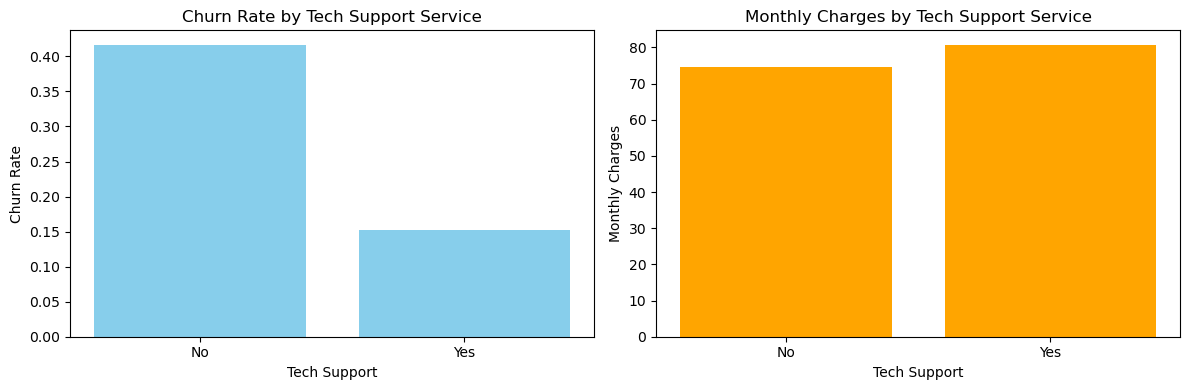

In [29]:
# Tech support is to pay for reducing waiting time for tech support, these customers pay more to save time

cond = df['Tech Support'].isin(['Yes','No'])
churn_mean = df[cond].groupby('Tech Support',observed=False)['Churn Value'].mean()
charges_mean = df[cond].groupby('Tech Support',observed=False)['Monthly Charges'].mean()

fig, ax = plt.subplots(1, 2, figsize=(12, 4)) 
ax[0].bar(churn_mean.index, churn_mean, color='skyblue')
ax[0].set_title('Churn Rate by Tech Support Service')
ax[0].set_xlabel('Tech Support')
ax[0].set_ylabel('Churn Rate')

ax[1].bar(charges_mean.index, charges_mean, color='orange')
ax[1].set_title('Monthly Charges by Tech Support Service')
ax[1].set_xlabel('Tech Support')
ax[1].set_ylabel('Monthly Charges')

plt.tight_layout() 
plt.show()

In [31]:
missing_total_charges = df[df['Total Charges']==' ']
print(missing_total_charges[['Tenure Months', 'Monthly Charges', 'Churn Value']])

      Tenure Months  Monthly Charges  Churn Value
2234              0            52.55            0
2438              0            20.25            0
2568              0            80.85            0
2667              0            25.75            0
2856              0            56.05            0
4331              0            19.85            0
4687              0            25.35            0
5104              0            20.00            0
5719              0            19.70            0
6772              0            73.35            0
6840              0            61.90            0


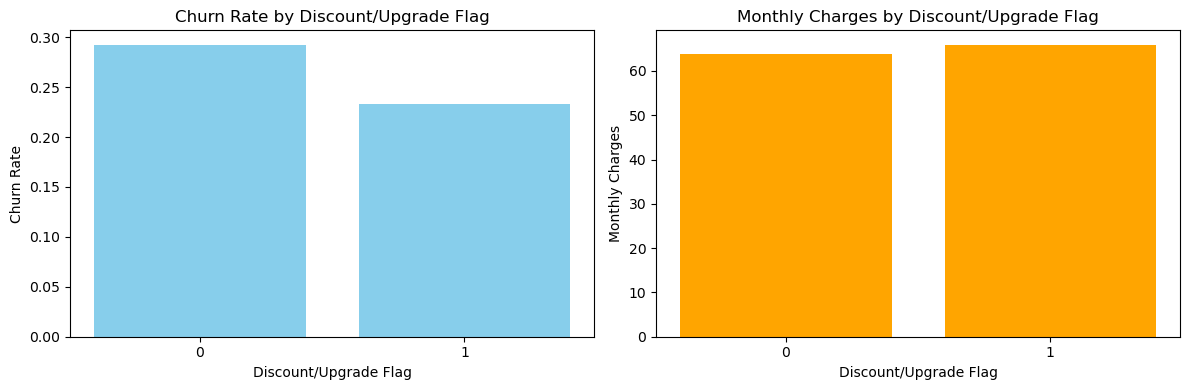

In [33]:
df['Calculated Total Charges'] = df['Tenure Months'] * df['Monthly Charges']
cond = df['Total Charges']==' '
df.loc[cond,'Total Charges'] = 0 # 11 new customers with tenure months being 0, no charge yet
df['Discount/Upgrade Flag'] = np.where(df['Total Charges'] < df['Calculated Total Charges'], 1, 0)
# these cutomers have calculated total charges smaller than actual total charges, either have discount or have upgraded plans

churn_mean = df.groupby('Discount/Upgrade Flag',observed=False)['Churn Value'].mean()
charges_mean = df.groupby('Discount/Upgrade Flag',observed=False)['Monthly Charges'].mean()

fig, ax = plt.subplots(1, 2, figsize=(12, 4))  

ax[0].bar(churn_mean.index.astype(str), churn_mean, color='skyblue')
ax[0].set_title('Churn Rate by Discount/Upgrade Flag')
ax[0].set_xlabel('Discount/Upgrade Flag')
ax[0].set_ylabel('Churn Rate')

ax[1].bar(charges_mean.index.astype(str), charges_mean, color='orange')
ax[1].set_title('Monthly Charges by Discount/Upgrade Flag')
ax[1].set_xlabel('Discount/Upgrade Flag')
ax[1].set_ylabel('Monthly Charges')

plt.tight_layout() 
plt.show()

### Because there factors are related with both churn rate and monthly charges (confounders), we need to remove the potential effects of these confounders, in order to analyze a cleaner relationship between churn and monthly charges. One way to do this is to first predicting churn and monthly charges using confounders, then subtract predicted values from actual values to get residuals, finally analyze the relationship between these residual churn and residual monthly charges. 

### Double ML model: Churn ~ Monthly Charges, control possible confounders in flexible forms

In [35]:
contract_mapping = {'Month-to-month': 0, 'One year': 1, 'Two year': 2}
df['Contract_Ordinal'] = df['Contract'].map(contract_mapping)

In [37]:
confounders = [
    'Partner', 'Dependents', 'Senior Citizen', 'Tenure Months',
    'Contract_Ordinal', 'Paperless Billing', 'Payment Method',
    'Discount/Upgrade Flag', 'n_service_internet_add_paid'
]

categorical = ['Senior Citizen', 'Partner', 'Dependents', 'Paperless Billing', 'Payment Method', 
               'Tenure Group']

numerical = ['Contract_Ordinal', 'Discount/Upgrade Flag', 'n_service_internet_add_paid']

X_cat = pd.get_dummies(df[categorical], drop_first=True).astype(int)
X_num = df[numerical]
X = pd.concat([X_cat, X_num], axis=1)

In [39]:
# cross-fitting
cv = KFold(n_splits=3, shuffle=True, random_state=42)
t_residuals = np.zeros(len(df))
y_residuals = np.zeros(len(df))

# Step 1: predict and calculate residuals for T and Y, using X
for train_idx, test_idx in cv.split(df):
    # train test split
    df_train, df_test = df.iloc[train_idx], df.iloc[test_idx]
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    
    # Train and predict continuous T using regressor, then calculate residual of T
    model_t = GradientBoostingRegressor(n_estimators=100, max_depth=6, learning_rate=0.1, random_state=42)\
    .fit(X_train, df_train['Monthly Charges'])
    t_pred = model_t.predict(X_test)
    t_residuals[test_idx] = df_test['Monthly Charges'] - t_pred
    
    # Train and predict Y probabilities (binary) using classifier, then calculate residual of Y
    model_y = GradientBoostingClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, random_state=42)\
    .fit(X_train, df_train['Churn Value'])
    y_proba = model_y.predict_proba(X_test)[:, 1]  
    y_residuals[test_idx] = df_test['Churn Value'] - y_proba


# Step 2: Final linear model (Y_residual ~ T_residual)
final_model = sm.OLS(y_residuals, sm.add_constant(np.column_stack([t_residuals]))).fit(cov_type='HC1')

results_df = pd.DataFrame({
    'Coefficient': final_model.params,
    'Std.Err.': final_model.bse,
    't-value': final_model.tvalues,
    'P>|t|': final_model.pvalues,
    '[0.025': final_model.conf_int()[:,0],
    '0.975]': final_model.conf_int()[:,1]
})

results_df.index = [
    'Intercept',
    'Monthly Charges'
]

monthly_charge_results = results_df.loc[['Monthly Charges']].round(4)
print(monthly_charge_results)

                 Coefficient  Std.Err.  t-value  P>|t|  [0.025  0.975]
Monthly Charges       0.0037    0.0003   14.774    0.0  0.0032  0.0042


### Average effect: a $10 decrease (increase) in monthly charges would decrease (increase) the churn rate by 3.7%, which is statistically significant. With the average churn rate being 27%, such effect is a relative decrease (increase) of 14%. 

### Robustness Check: using different models for predicting churn and monthly charges using cofounders

In [42]:
# cross-fitting
cv = KFold(n_splits=3, shuffle=True, random_state=42)
t_residuals = np.zeros(len(df))
y_residuals = np.zeros(len(df))

# Step 1: predict and calculate residuals for T and Y, using X
for train_idx, test_idx in cv.split(df):
    # train test split
    df_train, df_test = df.iloc[train_idx], df.iloc[test_idx]
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    
    # Train and predict continuous T using regressor, then calculate residual of T
    model_t = RandomForestRegressor(n_estimators=100, max_depth=6, random_state=42)\
    .fit(X_train, df_train['Monthly Charges'])
    t_pred = model_t.predict(X_test)
    t_residuals[test_idx] = df_test['Monthly Charges'] - t_pred
    
    # Train and predict Y probabilities (binary) using classifier, then calculate residual of Y
    model_y = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=42)\
    .fit(X_train, df_train['Churn Value'])
    y_proba = model_y.predict_proba(X_test)[:, 1]  
    y_residuals[test_idx] = df_test['Churn Value'] - y_proba


# Step 2: Final linear model (Y_residual ~ T_residual)
final_model = sm.OLS(y_residuals, sm.add_constant(np.column_stack([t_residuals]))).fit(cov_type='HC1')

results_df = pd.DataFrame({
    'Coefficient': final_model.params,
    'Std.Err.': final_model.bse,
    't-value': final_model.tvalues,
    'P>|t|': final_model.pvalues,
    '[0.025': final_model.conf_int()[:,0],
    '0.975]': final_model.conf_int()[:,1]
})

results_df.index = [
    'Intercept',
    'Monthly Charges'
]

monthly_charge_results = results_df.loc[['Monthly Charges']].round(4)
print(monthly_charge_results)

                 Coefficient  Std.Err.  t-value  P>|t|  [0.025  0.975]
Monthly Charges       0.0035    0.0003  13.7401    0.0   0.003   0.004


### Heterogeneous effects: customers with tenure months <= 12

In [44]:
# Step 3: Final model with interaction 
short_tenure_indicator = (df['Tenure Months'] <= 12).astype(int).values  
tenure_interaction = t_residuals * short_tenure_indicator
X_final = sm.add_constant(np.column_stack([t_residuals, tenure_interaction]))  # Add intercept
final_model_interaction = sm.OLS(y_residuals, X_final).fit(cov_type='HC1')

results_df = pd.DataFrame({
    'Coefficient': final_model_interaction.params,
    'Std.Err.': final_model_interaction.bse,
    't-value': final_model_interaction.tvalues,
    'P>|t|': final_model_interaction.pvalues,
    '[0.025': final_model_interaction.conf_int()[:,0],
    '0.975]': final_model_interaction.conf_int()[:,1]
})

results_df.index = [
    'Intercept',
    'Monthly Charges',
    'Monthly Charges (Tenure Months <= 12)'
]

monthly_charge_results = results_df.loc[['Monthly Charges','Monthly Charges (Tenure Months <= 12)']].round(4)
print(monthly_charge_results)

                                       Coefficient  Std.Err.  t-value   P>|t|  \
Monthly Charges                             0.0027    0.0003   9.7738  0.0000   
Monthly Charges (Tenure Months <= 12)       0.0023    0.0006   3.9627  0.0001   

                                       [0.025  0.975]  
Monthly Charges                        0.0022  0.0033  
Monthly Charges (Tenure Months <= 12)  0.0012  0.0035  


### For short-term customers (Tenure Months <= 12):  (31% of total customers), a $10 decrease (increase) in monthly charges would decrease (increase) the churn rate by 5%. 

### Remember from before: Average effect: a $10 decrease (increase) in monthly charges would decrease (increase) the churn rate by 3.7%. With the average churn rate being 27%, such effect is a relative decrease (increase) of 14%. 

In [47]:
df.groupby('Churn Value')['CLTV'].mean()

Churn Value
0    4490.921337
1    4149.414660
Name: CLTV, dtype: float64

In [49]:
df['Churn Value'].describe()

count    7043.000000
mean        0.265370
std         0.441561
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Churn Value, dtype: float64

### Incorporate the information on customer life time value (CLTV) in the data: 
### There are 7043 customers in the data, and the average cutomer life time value is \$4,149 for each customer who have churned.
### A \$10 decrease would decrease the churn rate by 3.7%, reduce the number of customers who churn by an amount of 261 (7043\*3.7%), and reduce the loss in CLTV by 1,082,889 (261\*4149), with the cost of 70,430 (7043\*10).

In [52]:
df['Churn Reason'].unique()

array(['Competitor made better offer', 'Moved',
       'Competitor had better devices',
       'Competitor offered higher download speeds',
       'Competitor offered more data', 'Price too high',
       'Product dissatisfaction', 'Service dissatisfaction',
       'Lack of self-service on Website', 'Network reliability',
       'Limited range of services',
       'Lack of affordable download/upload speed',
       'Long distance charges', 'Extra data charges', "Don't know",
       'Poor expertise of online support',
       'Poor expertise of phone support', 'Attitude of service provider',
       'Attitude of support person', 'Deceased', nan], dtype=object)

In [56]:
def categorize_reason(reason):
    charges_related = ['Competitor made better offer', 'Price too high', 'Long distance charges', 'Extra data charges', 
                   'Lack of affordable download/upload speed']
    product_related = ['Competitor had better devices', 'Competitor offered higher download speeds', 'Competitor offered more data', 
                   'Product dissatisfaction', 'Network reliability','Limited range of services']
    service_related = ['Service dissatisfaction','Lack of self-service on Website', 
                   'Poor expertise of online support', 'Poor expertise of phone support', 'Attitude of service provider',
                   'Attitude of support person'] 
    if reason in charges_related:
        return 'charges_related'
    elif reason in product_related:
        return 'product_related'
    elif reason in service_related:
        return 'service_related'
    elif pd.notna(reason):
        return 'Other'


<Axes: title={'center': 'Estimated Effect of Monthly Charges on Churn by Reason Category'}, xlabel='Churn Reason Category'>

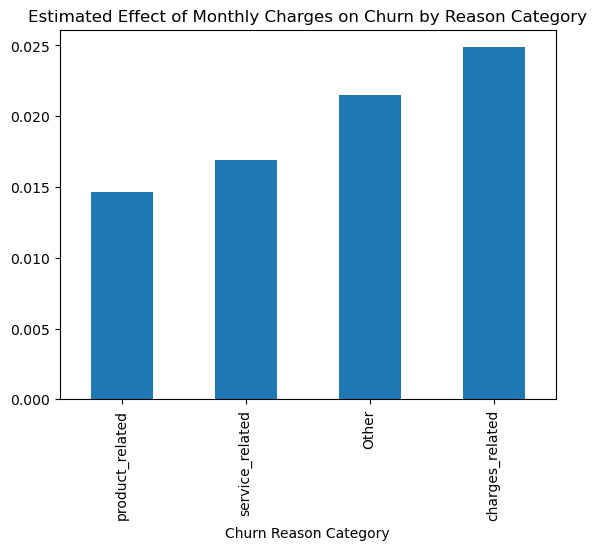

In [58]:
df_churned = df[df['Churn Value'] == 1].copy()
df_churned['Churn Reason Category'] = df_churned['Churn Reason'].apply(categorize_reason)

df_churned['cate_estimate'] = t_residuals[df_churned.index] * final_model.params[1]

cate_by_reason = df_churned.groupby('Churn Reason Category')['cate_estimate'].mean().sort_values()
cate_by_reason.plot(kind='bar', title='Estimated Effect of Monthly Charges on Churn by Reason Category')